<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n250.csv',
 'data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n30.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,79.296051,4393.294936,4482.590987,-70.285354,4552.876341
1,0.0,1.0,55.011024,-797.579372,-732.568348,72.767789,-805.336137
2,0.0,2.0,80.719321,-1412.055610,-1321.336289,-78.669258,-1242.667031
3,0.0,3.0,69.134174,1102.743094,1181.877269,-10.425902,1192.303170
4,0.0,4.0,71.641020,-1972.735986,-1891.094966,-25.192704,-1865.902262
...,...,...,...,...,...,...,...
29995,999.0,25.0,43.186669,-482.292318,-429.105649,-110.079090,-319.026558
29996,999.0,26.0,25.464331,41.378698,76.843029,191.388771,-114.545741
29997,999.0,27.0,44.729663,-446.394321,-391.664659,-136.326355,-255.338304
29998,999.0,28.0,86.515650,-2783.637552,-2687.121902,-847.131680,-1839.990222


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,79.296051,4393.294936,4482.590987,-70.285354,4552.876341
1,0.0,1.0,55.011024,-797.579372,-732.568348,72.767789,-805.336137
2,0.0,2.0,80.719321,-1412.055610,-1321.336289,-78.669258,-1242.667031
3,0.0,3.0,69.134174,1102.743094,1181.877269,-10.425902,1192.303170
4,0.0,4.0,71.641020,-1972.735986,-1891.094966,-25.192704,-1865.902262
...,...,...,...,...,...,...,...
29995,999.0,25.0,43.186669,-482.292318,-429.105649,-110.079090,-319.026558
29996,999.0,26.0,25.464331,41.378698,76.843029,191.388771,-114.545741
29997,999.0,27.0,44.729663,-446.394321,-391.664659,-136.326355,-255.338304
29998,999.0,28.0,86.515650,-2783.637552,-2687.121902,-847.131680,-1839.990222


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    79.296051  4393.294936  4482.590987  -70.285354  4552.876341
      1.0    55.011024  -797.579372  -732.568348   72.767789  -805.336137
      2.0    80.719321 -1412.055610 -1321.336289  -78.669258 -1242.667031
      3.0    69.134174  1102.743094  1181.877269  -10.425902  1192.303170
      4.0    71.641020 -1972.735986 -1891.094966  -25.192704 -1865.902262
...                ...          ...          ...         ...          ...
999.0 25.0   43.186669  -482.292318  -429.105649 -110.079090  -319.026558
      26.0   25.464331    41.378698    76.843029  191.388771  -114.545741
      27.0   44.729663  -446.394321  -391.664659 -136.326355  -255.338304
      28.0   86.515650 -2783.637552 -2687.121902 -847.131680 -1839.990222
      29.0   48.428351  -315.673841  -257.245490 -199.243314   -58.002176

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    79.296051  4393.294936  4482.590987  -70.285354  4552.876341
      1.0    55.011024  -797.579372  -732.568348   72.767789  -805.336137
      2.0    80.719321 -1412.055610 -1321.336289  -78.669258 -1242.667031
      3.0    69.134174  1102.743094  1181.877269  -10.425902  1192.303170
      4.0    71.641020 -1972.735986 -1891.094966  -25.192704 -1865.902262
...                ...          ...          ...         ...          ...
999.0 25.0   43.186669  -482.292318  -429.105649 -110.079090  -319.026558
      26.0   25.464331    41.378698    76.843029  191.388771  -114.545741
      27.0   44.729663  -446.394321  -391.664659 -136.326355  -255.338304
      28.0   86.515650 -2783.637552 -2687.121902 -847.131680 -1839.990222
      29.0   48.428351  -315.673841  -257.245490 -199.243314   -58.002176

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,79.296051,4393.294936,4482.590987,-70.285354,4552.876341
1,0.0,1.0,55.011024,-797.579372,-732.568348,72.767789,-805.336137
2,0.0,2.0,80.719321,-1412.055610,-1321.336289,-78.669258,-1242.667031
3,0.0,3.0,69.134174,1102.743094,1181.877269,-10.425902,1192.303170
4,0.0,4.0,71.641020,-1972.735986,-1891.094966,-25.192704,-1865.902262
...,...,...,...,...,...,...,...
29995,999.0,25.0,43.186669,-482.292318,-429.105649,-110.079090,-319.026558
29996,999.0,26.0,25.464331,41.378698,76.843029,191.388771,-114.545741
29997,999.0,27.0,44.729663,-446.394321,-391.664659,-136.326355,-255.338304
29998,999.0,28.0,86.515650,-2783.637552,-2687.121902,-847.131680,-1839.990222


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    79.296051  4393.294936  4482.590987  -70.285354  4552.876341
      1.0    55.011024  -797.579372  -732.568348   72.767789  -805.336137
      2.0    80.719321 -1412.055610 -1321.336289  -78.669258 -1242.667031
      3.0    69.134174  1102.743094  1181.877269  -10.425902  1192.303170
      4.0    71.641020 -1972.735986 -1891.094966  -25.192704 -1865.902262
...                ...          ...          ...         ...          ...
999.0 25.0   43.186669  -482.292318  -429.105649 -110.079090  -319.026558
      26.0   25.464331    41.378698    76.843029  191.388771  -114.545741
      27.0   44.729663  -446.394321  -391.664659 -136.326355  -255.338304
      28.0   86.515650 -2783.637552 -2687.121902 -847.131680 -1839.990222
      29.0   48.428351  -315.673841  -257.245490 -199.243314   -58.002176

[30000 rows x 5 columns]

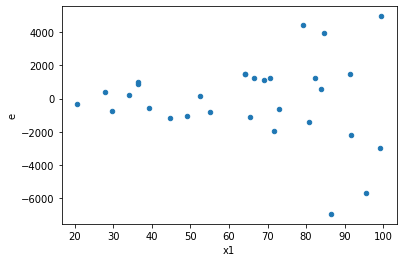

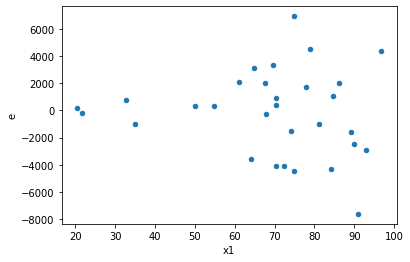

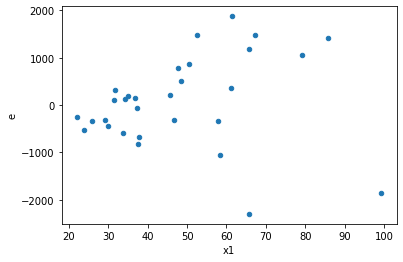

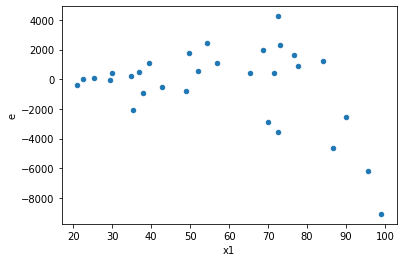

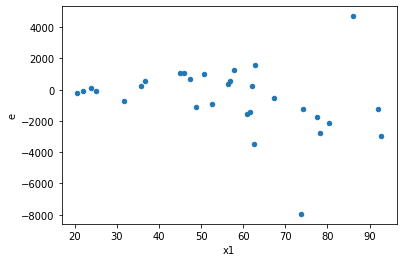

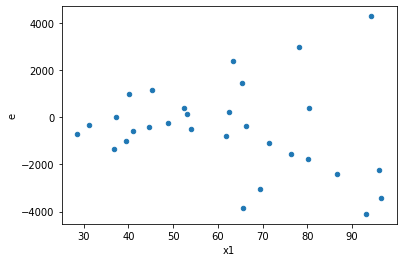

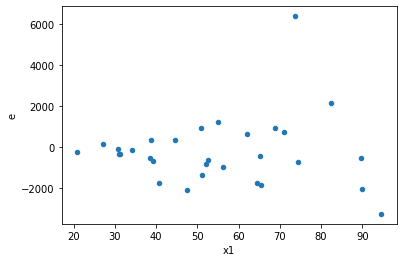

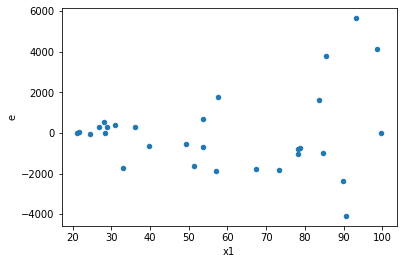

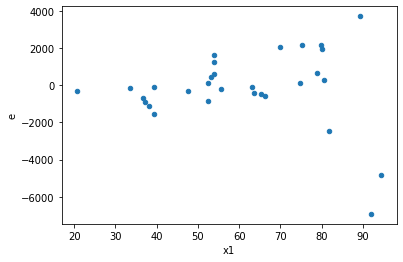

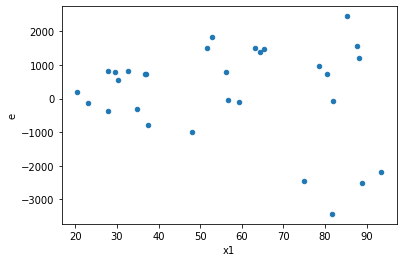

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,11.0,11.0,771115.6539762804,20440147.691633865,70101.42308875277,1858195.2446939878,26.507239979157013,5.067349349907602e-06,0.999997466325325,2.533674674953801e-06,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,4937359.034267738,65273791.5734257,448850.82129706716,5933981.0521296095,13.220385862237883,0.00016678154495353148,0.9999166092275232,8.339077247676574e-05,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,3526659.599853673,80058483.3722771,320605.4181685157,7278043.942934281,22.70093869439479,1.1234991956987628e-05,0.9999943825040215,5.617495978493814e-06,Reject001=0 : Heteroscedasticity
11.0,11.0,11.0,2894270.8864450743,55189013.60217556,263115.5351313704,5017183.054743233,19.068364976010308,2.7219097111563784e-05,0.9999863904514442,1.3609548555781892e-05,Reject001=0 : Heteroscedasticity
12.0,11.0,11.0,1324779.3831454925,41929475.12965604,120434.48937686296,3811770.466332367,31.65015674542029,2.0187896314638465e-06,0.9999989906051843,1.0093948157319232e-06,Reject001=0 : Heteroscedasticity
13.0,11.0,11.0,5980274.864432557,70587964.995055,543661.3513120506,6417087.726823182,11.803464990359235,0.00028788051806061254,0.9998560597409697,0.00014394025903030627,Reject001=0 : Heteroscedasticity
14.0,11.0,11.0,8392517.522926675,37562073.5103758,762956.1384478796,3414733.955488709,4.475662208361644,0.019774339735437962,0.990112830132281,0.009887169867718981,Reject001=1 : Homoscedasticity
15.0,11.0,11.0,4729707.819160015,127828136.75540754,429973.43810545595,11620739.70503705,27.026645544060166,4.583996044527083e-06,0.9999977080019777,2.2919980222635417e-06,Reject001=0 : Heteroscedasticity
17.0,11.0,11.0,12356505.018554566,81613011.47919771,1123318.638050415,7419364.679927065,6.604862083303278,0.004050552919699912,0.99797472354015,0.002025276459849956,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,154912321.33273017,7924052.835798143,14082938.30297547,720368.439618013,0.05115185653165946,2.4003425823568003e-05,Reject001=0 : Heteroscedasticity
1.0,11.0,11.0,152655402.99241027,36495265.56425647,13877763.908400934,3317751.414932406,0.2390695962858972,0.025555264728885137,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,771115.6539762804,20440147.691633865,70101.42308875277,1858195.2446939878,26.507239979157013,5.067349349907602e-06,Reject001=0 : Heteroscedasticity
3.0,11.0,11.0,84500638.05485933,7078859.808016719,7681876.186805394,643532.7098197017,0.08377285628803177,0.0002727969765439789,Reject001=0 : Heteroscedasticity
4.0,11.0,11.0,101603188.41143519,4574290.989156812,9236653.491948653,415844.63537789206,0.045021136252472053,1.2556412138744512e-05,Reject001=0 : Heteroscedasticity
5.0,11.0,11.0,69897891.74033132,4972715.511464705,6354353.794575575,452065.04649679136,0.07114256793235198,0.0001237448378384384,Reject001=0 : Heteroscedasticity
6.0,11.0,11.0,4937359.034267738,65273791.5734257,448850.82129706716,5933981.0521296095,13.220385862237883,0.00016678154495353148,Reject001=0 : Heteroscedasticity
7.0,11.0,11.0,3526659.599853673,80058483.3722771,320605.4181685157,7278043.942934281,22.70093869439479,1.1234991956987628e-05,Reject001=0 : Heteroscedasticity
8.0,11.0,11.0,81237398.18454984,3838887.7392898905,7385218.016777258,348989.7944808991,0.047255178342479096,1.6067616171303353e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    909
Reject001=1 : Homoscedasticity       91
Name: Result_test, dtype: int64